In [2]:
#data loading
import pandas as pd
filename="/content/VietNamI.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames  pharvis   lnhhexp       age     sex  married  educ  illness  \
0             1        0  2.730363  3.761200    male        1     2        1   
1             2        0  2.737248  2.944439  female        0     0        1   
2             3        0  2.266935  2.564950    male        0     4        0   
3             4        1  2.392753  3.637586  female        1     3        1   
4             5        1  3.105335  3.295837    male        1     3        1   
...         ...      ...       ...       ...     ...      ...   ...      ...   
27760     27762        0  1.847290  1.609438  female        0     5        2   
27761     27763        0  2.461460  2.833213  female        0     6        0   
27762     27764        0  2.460262  2.564950  female        0     5        0   
27763     27765        0  1.920169  4.007333  female        1     4        2   
27764     27766        3  2.468833  3.135494    male        0     3        2   

       injury  illdays  actdays  insura

In [3]:
##Checking for null values
a.isna().sum()

,0
rownames,0
pharvis,0
lnhhexp,0
age,0
sex,0
married,0
educ,0
illness,0
injury,0
illdays,0


In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="commune"

#transform string into int
transformColumns={4}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames  pharvis   lnhhexp       age  sex  married  educ  illness  \
0             1        0  2.730363  3.761200    1        1     2        1   
1             2        0  2.737248  2.944439    0        0     0        1   
2             3        0  2.266935  2.564950    1        0     4        0   
3             4        1  2.392753  3.637586    0        1     3        1   
4             5        1  3.105335  3.295837    1        1     3        1   
...         ...      ...       ...       ...  ...      ...   ...      ...   
27760     27762        0  1.847290  1.609438    0        0     5        2   
27761     27763        0  2.461460  2.833213    0        0     6        0   
27762     27764        0  2.460262  2.564950    0        0     5        0   
27763     27765        0  1.920169  4.007333    0        1     4        2   
27764     27766        3  2.468833  3.135494    1        0     3        2   

       injury  illdays  actdays  insurance  commune  
0           0        

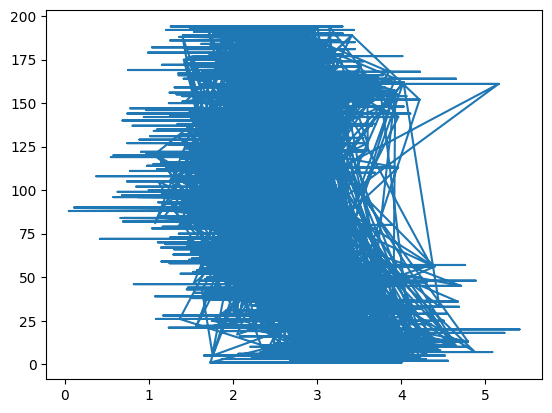

In [5]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 27765 artists>

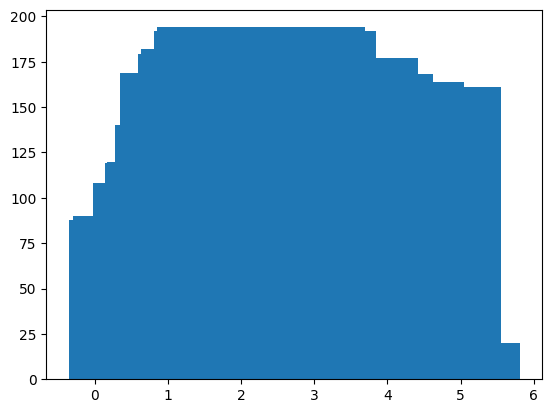

In [6]:
plt.bar(a[a.columns[2]],a[str(target)])

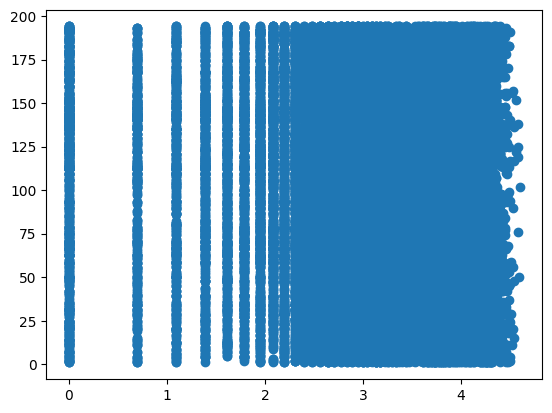

In [7]:
plt.scatter(a[a.columns[3]], a[str(target)])

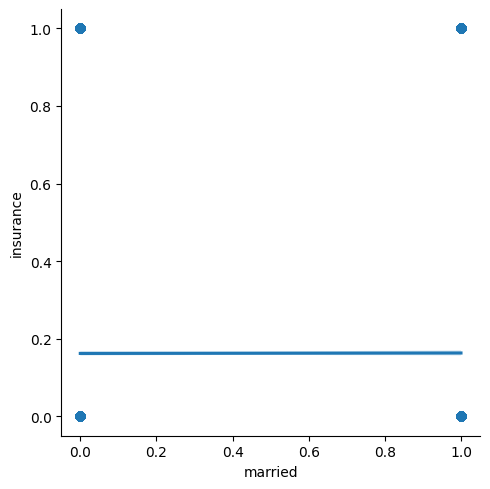

In [9]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="married",y="insurance",data=a)

<Axes: xlabel='sex', ylabel='commune'>

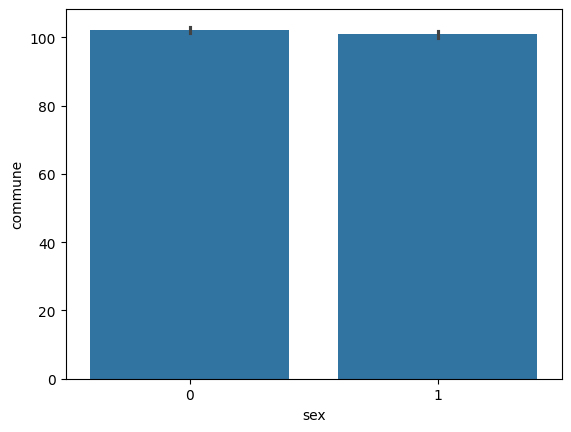

In [10]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='actdays', ylabel='commune'>

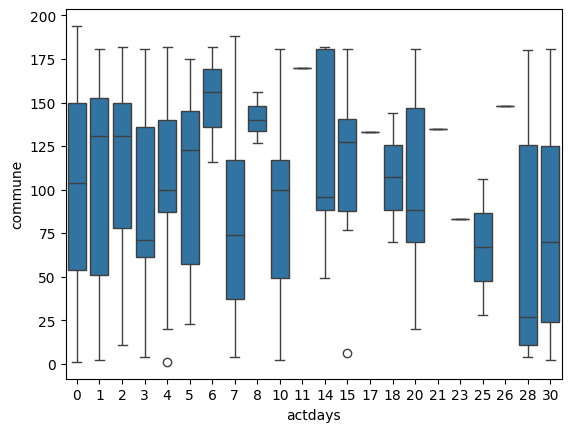

In [11]:
sns.boxplot(x=a.columns[10],y=str(target),data=a)

<ipython-input-12-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='commune', ylabel='Density'>

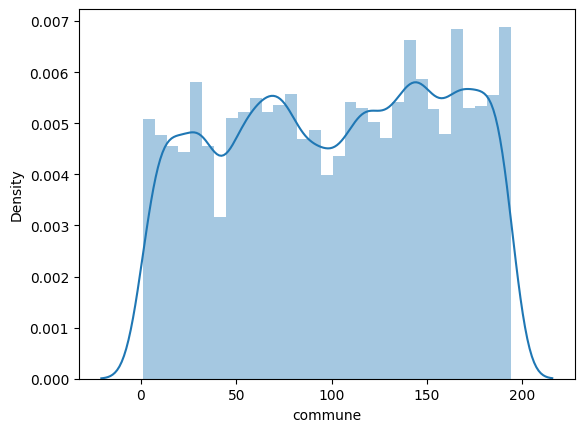

In [12]:
sns.distplot(a[str(target)])

<Axes: xlabel='age', ylabel='Density'>

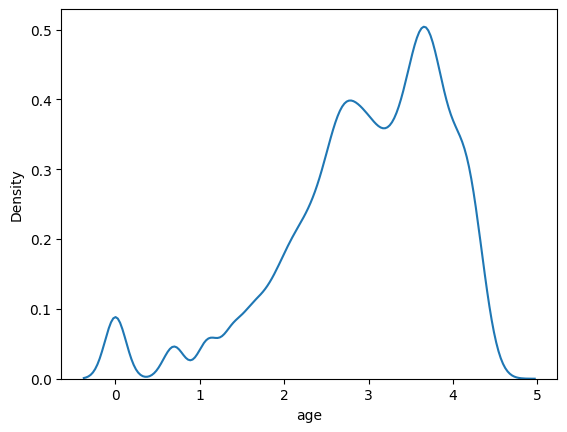

In [13]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='married', ylabel='count'>

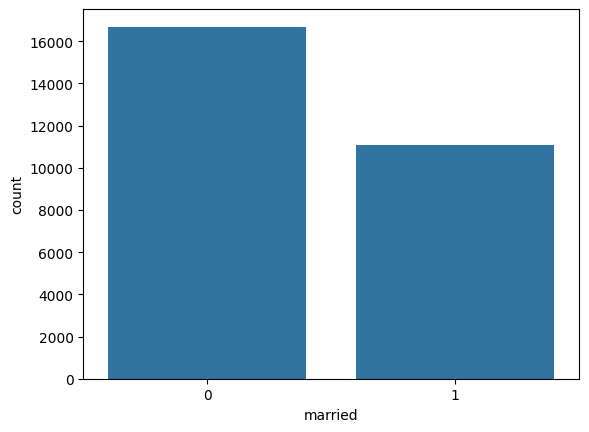

In [14]:
sns.countplot(x=a.columns[5],data=a)

<Axes: >

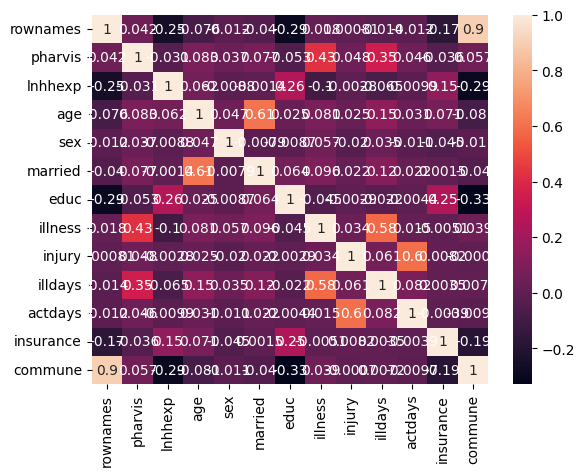

In [17]:
#data=a.select_dtypes(include=np.number).corr()
#Produce heatmap
data=a.corr()
sns.heatmap(data, annot=True)

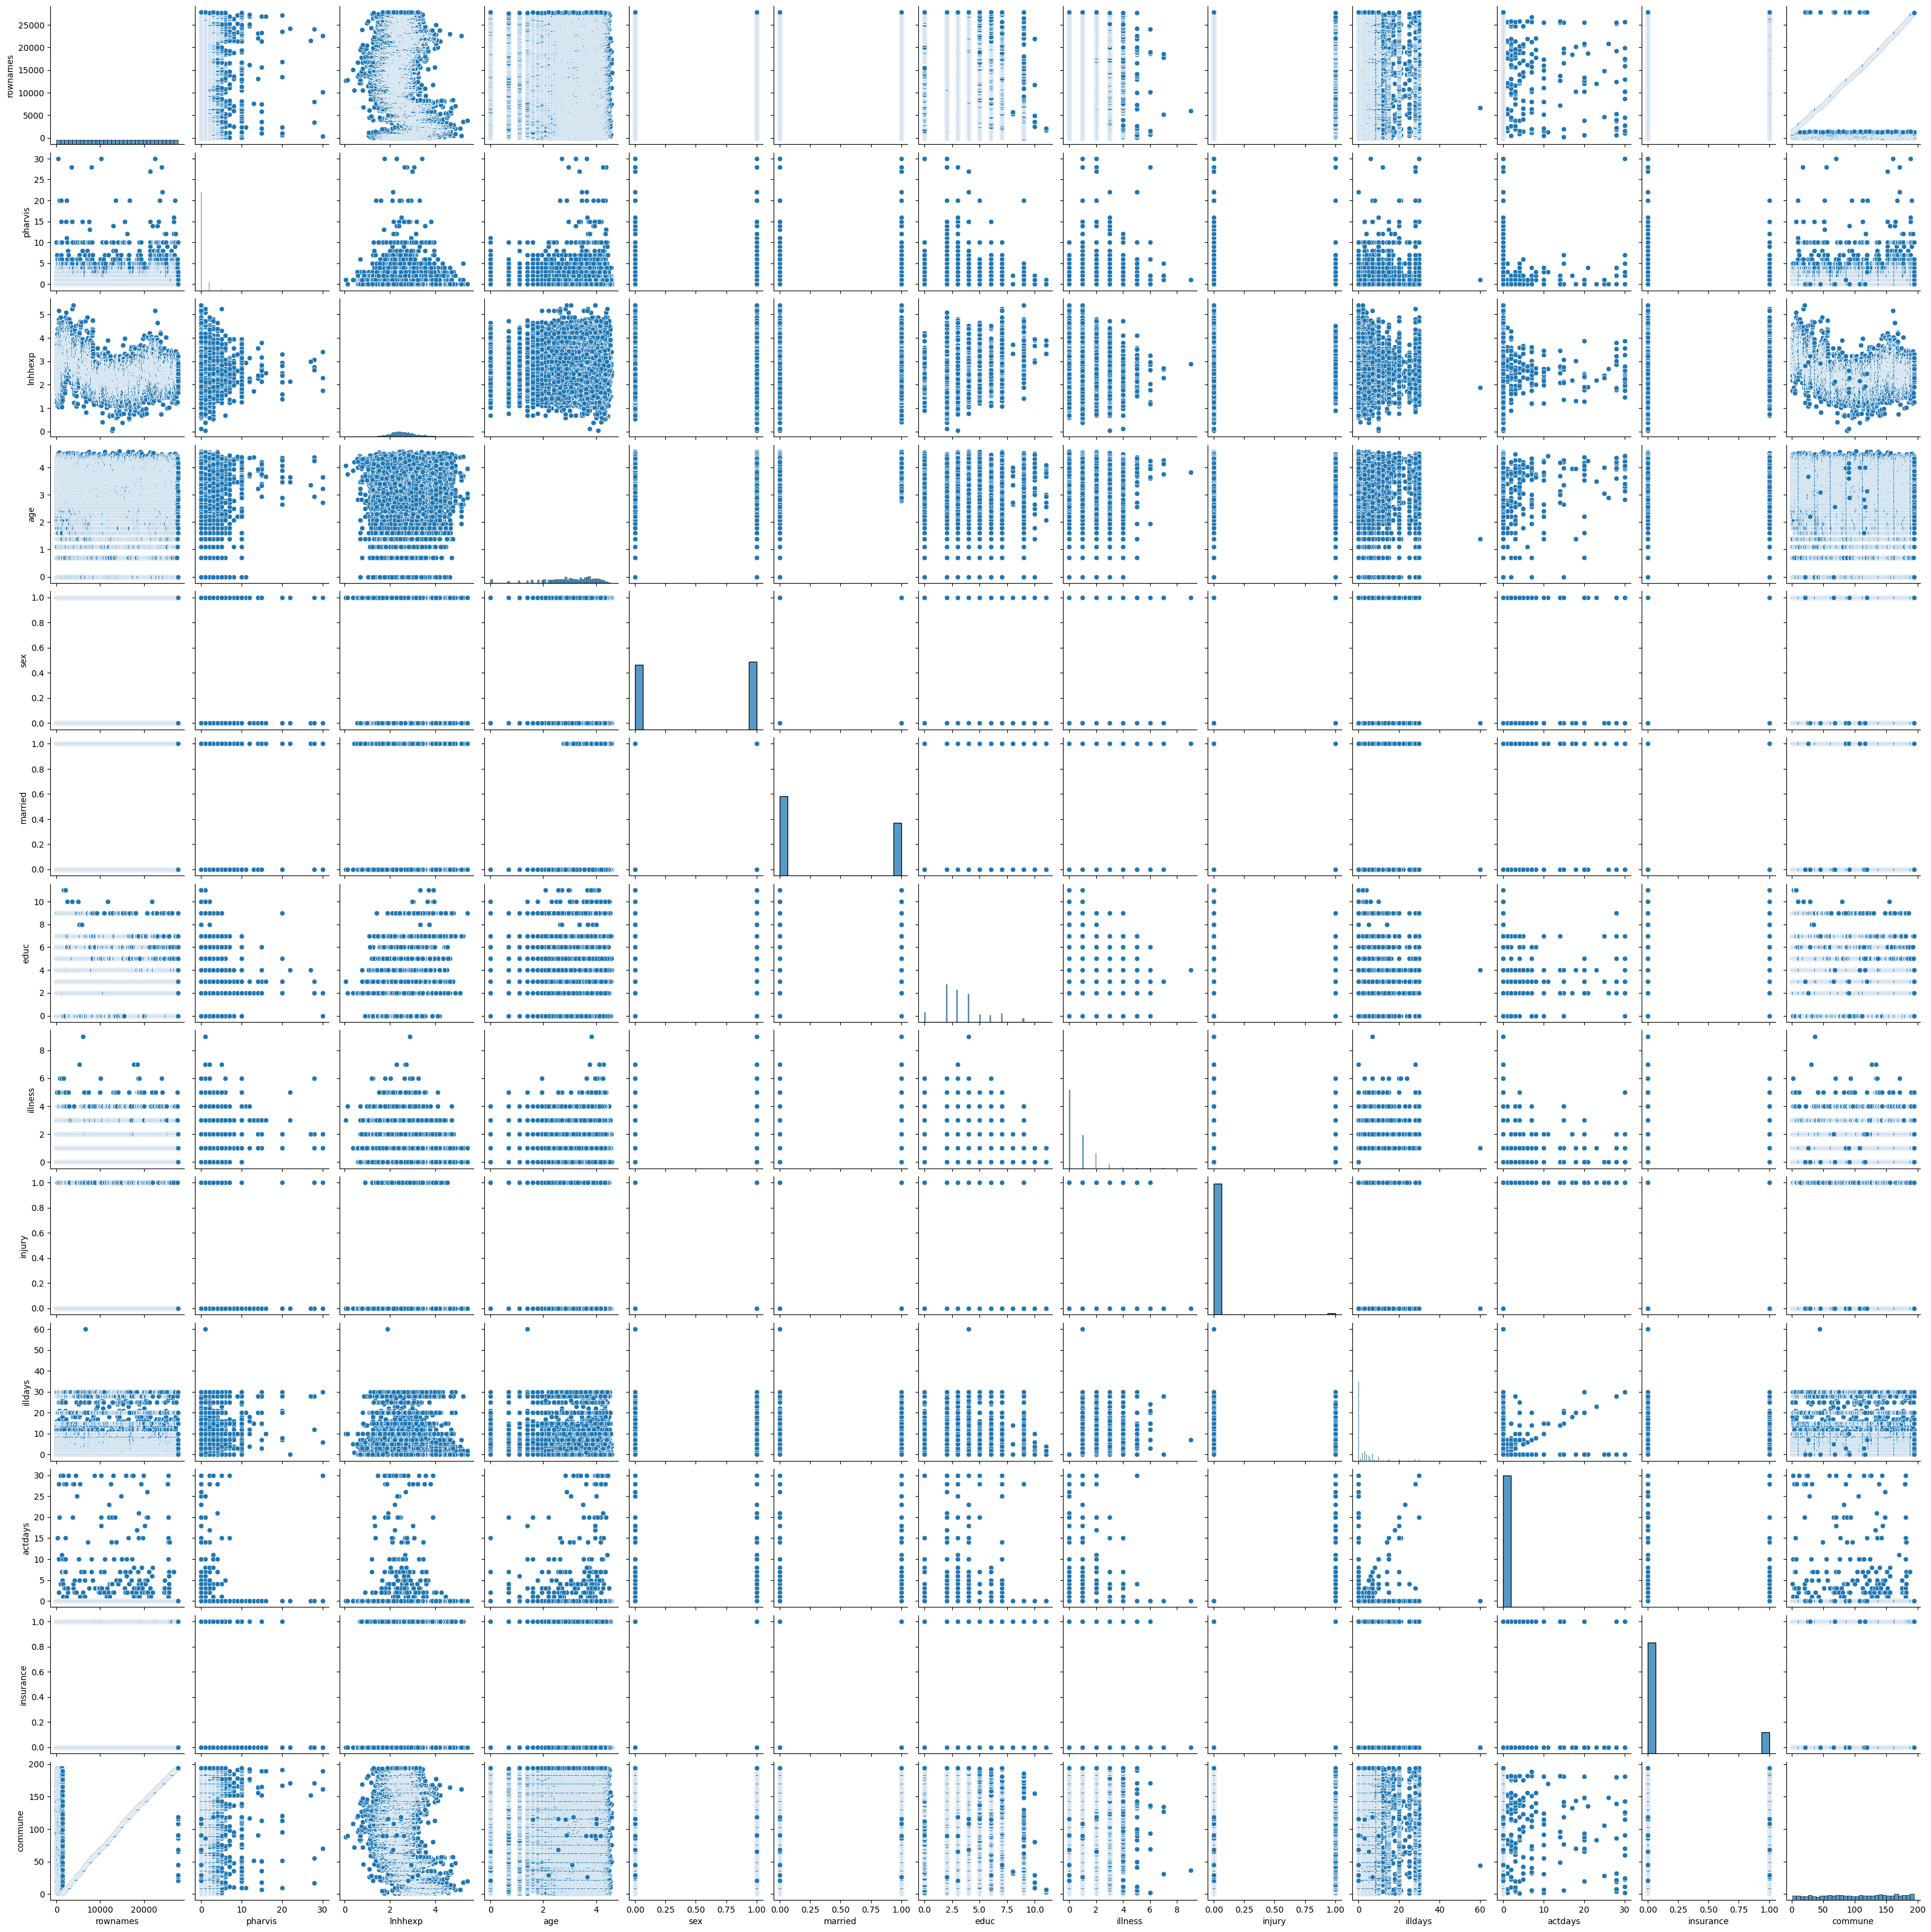

In [18]:
sns.pairplot(data=a)

In [19]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  pharvis   lnhhexp       age  sex  married  educ  illness  \
0             1        0  2.730363  3.761200    1        1     2        1   
1             2        0  2.737248  2.944439    0        0     0        1   
2             3        0  2.266935  2.564950    1        0     4        0   
3             4        1  2.392753  3.637586    0        1     3        1   
4             5        1  3.105335  3.295837    1        1     3        1   
...         ...      ...       ...       ...  ...      ...   ...      ...   
27760     27762        0  1.847290  1.609438    0        0     5        2   
27761     27763        0  2.461460  2.833213    0        0     6        0   
27762     27764        0  2.460262  2.564950    0        0     5        0   
27763     27765        0  1.920169  4.007333    0        1     4        2   
27764     27766        3  2.468833  3.135494    1        0     3        2   

       injury  illdays  actdays  insurance  
0           0        7        

In [20]:
print(y)

0        192
1        167
2         76
3        123
4        148
        ... 
27760    115
27761    115
27762    116
27763    116
27764    119
Name: commune, Length: 27765, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
print(x_train)

       rownames  pharvis   lnhhexp       age  sex  married  educ  illness  \
24728     24729        0  1.895554  2.564950    0        0     2        0   
14217     14218        1  2.706446  3.912023    1        1     4        2   
9092       9093        0  1.874600  3.218876    1        1     4        0   
24181     24182        3  1.685874  0.693147    0        0     3        1   
19438     19439        0  1.574304  2.995732    0        0     0        1   
...         ...      ...       ...       ...  ...      ...   ...      ...   
8608       8609        0  1.944876  4.343805    1        0     2        0   
7414       7415        0  2.368676  2.995732    1        0     3        0   
5387       5388        0  3.867368  0.000000    0        0     9        3   
13256     13257        0  2.494259  2.302585    1        0     4        0   
16347     16348        0  1.547668  0.000000    0        0     4        2   

       injury  illdays  actdays  insurance  
24728       0        0        

In [23]:
print(y_train)

24728    175
14217    101
9092      63
24181    171
19438    140
        ... 
8608      59
7414      50
5387      32
13256     93
16347    117
Name: commune, Length: 22212, dtype: int64


In [24]:
print(x_test)

       rownames  pharvis   lnhhexp       age  sex  married  educ  illness  \
18398     18399        0  2.649423  2.639057    1        0     2        0   
15875     15876        0  1.495611  3.610918    0        1     3        0   
20112     20113        0  2.874654  3.367296    1        1     5        1   
19389     19390        0  2.645631  2.302585    0        0     3        1   
23337     23338        3  2.600219  2.833213    0        0     4        1   
...         ...      ...       ...       ...  ...      ...   ...      ...   
1747       1748        0  3.492268  2.484907    0        0     6        0   
26536     26537        3  2.630249  3.258096    0        1     2        2   
16215     16216        0  2.380780  3.526361    1        1     4        0   
21550     21551        1  1.939988  3.850147    1        0     0        1   
2413       2414        2  3.526782  4.094345    0        0     4        1   

       injury  illdays  actdays  insurance  
18398       0        0        

In [25]:
print(y_test)

18398    133
15875    114
20112    144
19389    139
23337    166
        ... 
1747       4
26536    187
16215    117
21550    153
2413      10
Name: commune, Length: 5553, dtype: int64


In [26]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [27]:
print(ypred)

[130.77137624 118.70504416 135.92288258 ... 113.0248669  156.61781228
  26.64293024]


In [29]:
print(model.predict([[18399,0,2.649423,2.639057,1,0,2,0,0,0,0,0]]))

[130.77137624]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [31]:
print(ypred)

[133. 114. 144. ... 117. 153.  10.]


In [32]:
print(model.predict([[18399,0,2.649423,2.639057,1,0,2,0,0,0,0,0]]))

[130.77137624]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [34]:
print(ypred)

[133. 114. 144. ... 117. 153.  10.]


In [35]:
print(model.predict([[18399,0,2.649423,2.639057,1,0,2,0,0,0,0,0]]))

[130.77137624]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
